In [1]:
import warnings
import pathlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import intake
import healpy

In [31]:
cat = intake.open_catalog(
    '/work/bm1235/k203123/nextgems_prefinal/experiments/ngc4008a/outdata/ngc4008a.yaml'
)
ds_icon_inst = cat.ngc4008a(chunks="auto", zoom=9, time='PT15M').to_dask()
ds_icon_inst_1 = ds_icon_inst.sel(time=slice('2021-07-01-00:00:00', '2021-07-08-00:00:00'))
ds_icon_inst_2 = ds_icon_inst.sel(time=slice('2033-07-01-00:00:00', '2033-07-08-00:00:00'))

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [130]:
ds_icon_inst_1

<xarray.Dataset> Size: 8TB
Dimensions:     (time: 672, level_full: 90, cell: 3145728, crs: 1,
                 level_half: 91)
Coordinates:
  * crs         (crs) float32 4B nan
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 5kB 2021-07-01T00:15:00 ... 2021-07-08
    zg          (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    zghalf      (level_half, cell) float32 1GB dask.array<chunksize=(62, 524288), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/15)
    cli         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    clw         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    dzghalf     (level_full, cell) float32 1GB dask.array<chunksize=(60, 524288), meta=np.ndarray>
    hus         (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pfull       (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pr          (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ...          ...
    rlut        (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ta          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    ts          (time, cell) float32 8GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ua          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    va          (time, level_full, cell) float32 761GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    wa_phy      (time, level_half, cell) float32 769GB dask.array<chunksize=(1, 31, 262144), meta=np.ndarray>

In [36]:
lon = xr.DataArray(np.arange(0.05, 360, 0.1), dims=("lon",), name="lon", attrs=dict(units="degrees", standard_name="longitude"))
lat = xr.DataArray(np.arange(89.95, -90, -0.1), dims=("lat",), name="lat", attrs=dict(units="degrees", standard_name="latitude"))

pix = xr.DataArray(
    healpy.ang2pix(ds_icon_inst_1.crs.healpix_nside, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(lat, lon),
)


In [37]:
%%time
T = ds_icon_inst_1.isel(time=0).ta.drop_vars("zg").compute().isel(cell=pix)

CPU times: user 18.7 s, sys: 3.49 s, total: 22.2 s
Wall time: 20.3 s


In [38]:
T

<xarray.DataArray 'ta' (level_full: 90, lat: 1800, lon: 3600)> Size: 2GB
array([[[209.53758, 209.53758, 209.53758, ..., 209.58989, 209.58989,
         209.58989],
        [209.49818, 209.49818, 209.49818, ..., 209.54825, 209.54825,
         209.54825],
        [209.48238, 209.48238, 209.48238, ..., 209.54533, 209.54533,
         209.54533],
        ...,
        [131.04605, 131.04605, 131.04605, ..., 129.25328, 129.25328,
         129.25328],
        [131.04166, 131.04166, 131.04166, ..., 129.15924, 129.15924,
         129.15924],
        [129.95628, 129.95628, 129.95628, ..., 128.10193, 128.10193,
         128.10193]],

       [[226.44136, 226.44136, 226.44136, ..., 226.53667, 226.53667,
         226.53667],
        [226.38246, 226.38246, 226.38246, ..., 226.4727 , 226.4727 ,
         226.4727 ],
        [226.3582 , 226.3582 , 226.3582 , ..., 226.47417, 226.47417,
         226.47417],
...
        [225.21576, 225.21576, 225.21576, ..., 223.8532 , 223.8532 ,
         223.8532 ],
        [225.19556, 225.19556, 225.19556, ..., 224.7659 , 224.7659 ,
         224.7659 ],
        [224.04427, 224.04427, 224.04427, ..., 224.22873, 224.22873,
         224.22873]],

       [[272.5674 , 272.5674 , 272.5674 , ..., 272.45752, 272.45752,
         272.45752],
        [272.4311 , 272.4311 , 272.4311 , ..., 272.31946, 272.31946,
         272.31946],
        [272.29758, 272.29758, 272.29758, ..., 272.10663, 272.10663,
         272.10663],
        ...,
        [222.58353, 222.58353, 222.58353, ..., 222.66418, 222.66418,
         222.66418],
        [223.74669, 223.74669, 223.74669, ..., 223.28418, 223.28418,
         223.28418],
        [223.59541, 223.59541, 223.59541, ..., 223.17444, 223.17444,
         223.17444]]], dtype=float32)
Coordinates:
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
    time        datetime64[ns] 8B 2021-07-01T00:15:00
  * lat         (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon         (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
Attributes:
    cell_methods:   time: point
    component:      atmo
    grid_mapping:   crs
    long_name:      Temperature
    standard_name:  air_temperature
    units:          K
    vgrid:          reference

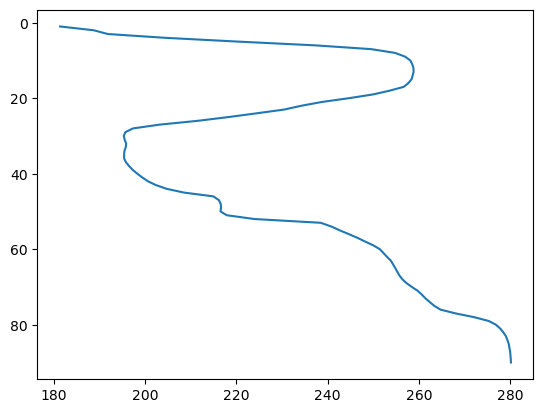

In [39]:
plt.plot(T.mean(["lat", "lon"]), T.level_full)
plt.gca().invert_yaxis()

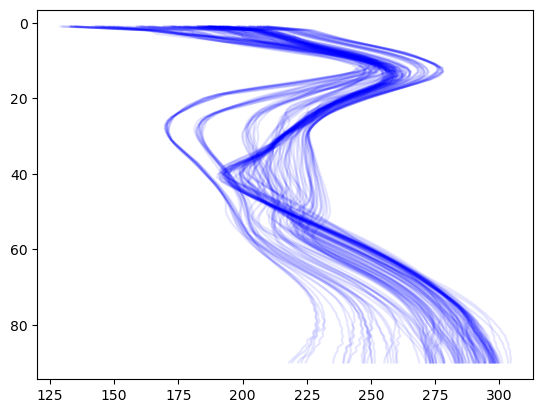

In [43]:
plt.plot(T.coarsen({"lat":150, "lon":300}).mean().data.reshape([90,-1]), T.level_full, "b-", alpha=0.1)
plt.gca().invert_yaxis()

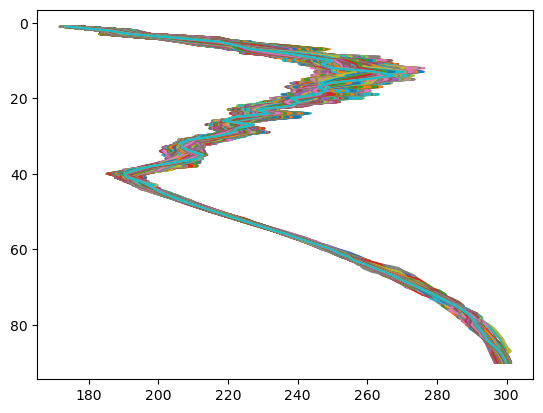

In [44]:
plt.plot(T[:,850:950,800:900].data.reshape([90,-1]), T.level_full)
plt.gca().invert_yaxis()

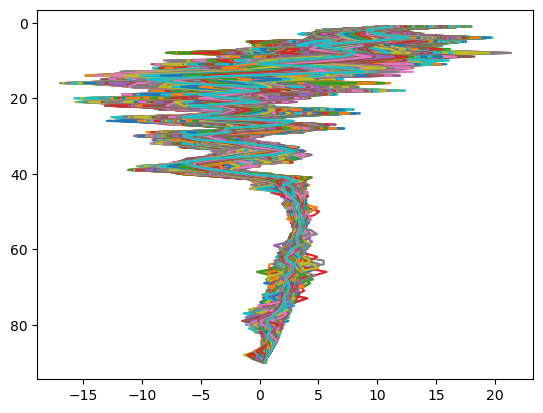

In [45]:
plt.plot(T[:,850:950,800:900].differentiate("level_full").data.reshape([90,-1]), T.level_full)
plt.gca().invert_yaxis()

In [120]:
def find_tropopause(T, return_trop_temp=False):
    """
    Find the approximate tropopause level in ICON data
    """
    lowest_inversion = (
        T.level_full * (T.isel(level_full=slice(0,60)).differentiate("level_full") < -0.5)
    ).max("level_full")
    
    trop_level = lowest_inversion + T.sel(
        level_full=xr.concat([lowest_inversion + i for i in range(-3,4)], dim="new_level").assign_coords({"new_level":range(-3,4)})
    ).idxmin("new_level")
    
    if return_trop_temp:
        return trop_level, T.sel(level_full=trop_level)
    return trop_level


In [121]:
trop_levels = find_tropopause(T)

In [122]:
trop_levels

<xarray.DataArray (lat: 1800, lon: 3600)> Size: 52MB
array([[55., 55., 55., ..., 55., 55., 55.],
       [55., 55., 55., ..., 55., 55., 55.],
       [55., 55., 55., ..., 55., 55., 55.],
       ...,
       [27., 27., 27., ..., 27., 27., 27.],
       [27., 27., 27., ..., 27., 27., 27.],
       [27., 27., 27., ..., 27., 27., 27.]])
Coordinates:
    time     datetime64[ns] 8B 2021-07-01T00:15:00
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0

In [123]:
trop_levels.max(), trop_levels.min()

(<xarray.DataArray ()> Size: 8B
 array(62.)
 Coordinates:
     time     datetime64[ns] 8B 2021-07-01T00:15:00,
 <xarray.DataArray ()> Size: 8B
 array(23.)
 Coordinates:
     time     datetime64[ns] 8B 2021-07-01T00:15:00)

In [124]:
wh_min = trop_levels.stack(dim_0=('lat', 'lon')).where(trop_levels.stack(dim_0=('lat', 'lon'))==trop_levels.stack(dim_0=('lat', 'lon')).min(), drop=True).squeeze()
                                                                

In [125]:
T.sel(
    lat=xr.DataArray(wh_min.lat.data, dims="points"), 
    lon=xr.DataArray(wh_min.lon.data, dims="points")
)

<xarray.DataArray 'ta' (level_full: 90, points: 12)> Size: 4kB
array([[170.5033 , 170.5033 , 170.36269, ..., 164.40672, 164.11243,
        164.11243],
       [196.89392, 196.89392, 196.74393, ..., 193.71405, 192.347  ,
        192.347  ],
       [199.16943, 199.16943, 198.90796, ..., 197.52641, 197.33551,
        197.33551],
       ...,
       [270.9143 , 270.9143 , 270.9238 , ..., 269.18933, 269.06552,
        269.06552],
       [271.6294 , 271.6294 , 271.63876, ..., 269.89072, 269.76294,
        269.76294],
       [272.1947 , 272.1947 , 272.2025 , ..., 270.4232 , 270.291  ,
        270.291  ]], dtype=float32)
Coordinates:
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
    time        datetime64[ns] 8B 2021-07-01T00:15:00
    lat         (points) float64 96B -49.05 -49.15 -49.15 ... -53.15 -53.25
    lon         (points) float64 96B 42.25 42.25 42.35 ... 45.35 45.55 45.55
Dimensions without coordinates: points
Attributes:
    cell_methods:   time: point
    component:      atmo
    grid_mapping:   crs
    long_name:      Temperature
    standard_name:  air_temperature
    units:          K
    vgrid:          reference

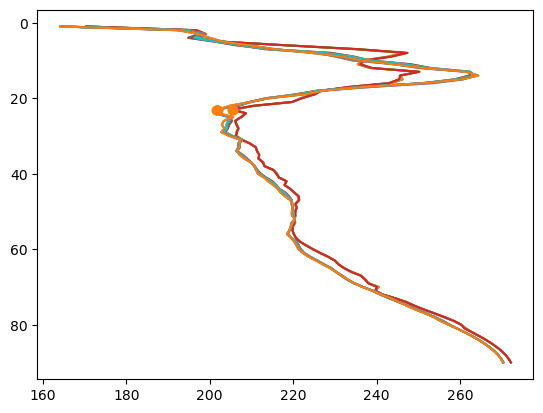

In [126]:
tsel = T.sel(
    lat=xr.DataArray(wh_min.lat.data, dims="points"), 
    lon=xr.DataArray(wh_min.lon.data, dims="points")
)
plt.plot(tsel, T.level_full)
plt.plot(*find_tropopause(tsel, return_trop_temp=True)[::-1], "C1o")
plt.gca().invert_yaxis()

In [127]:
wh_max = trop_levels.stack(dim_0=('lat', 'lon')).where(trop_levels.stack(dim_0=('lat', 'lon'))==trop_levels.stack(dim_0=('lat', 'lon')).max(), drop=True).squeeze()
                                                                

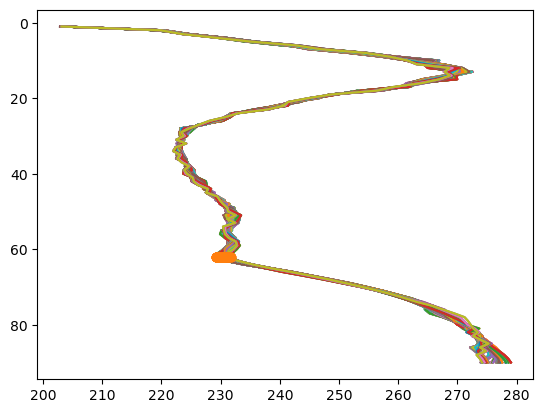

In [128]:
tsel = T.sel(
    lat=xr.DataArray(wh_max.lat.data, dims="points"), 
    lon=xr.DataArray(wh_max.lon.data, dims="points")
)
plt.plot(tsel, T.level_full)
plt.plot(*find_tropopause(tsel, return_trop_temp=True)[::-1], "C1o")
plt.gca().invert_yaxis()

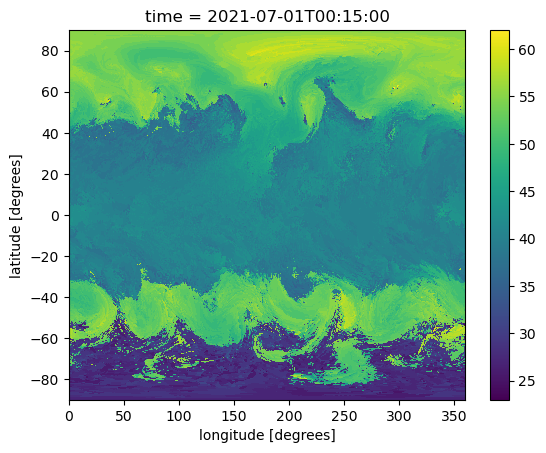

In [129]:
trop_levels.plot()

In [131]:
P = ds_icon_inst_1.isel(time=0).pfull.drop_vars("zg").compute().isel(cell=pix)

In [132]:
P

<xarray.DataArray 'pfull' (level_full: 90, lat: 1800, lon: 3600)> Size: 2GB
array([[[3.47896433e+00, 3.47896433e+00, 3.47896433e+00, ...,
         3.48055768e+00, 3.48055768e+00, 3.48055768e+00],
        [3.47776794e+00, 3.47776794e+00, 3.47776794e+00, ...,
         3.47923613e+00, 3.47923613e+00, 3.47923613e+00],
        [3.47738028e+00, 3.47738028e+00, 3.47738028e+00, ...,
         3.47926879e+00, 3.47926879e+00, 3.47926879e+00],
        ...,
        [2.83705890e-01, 2.83705890e-01, 2.83705890e-01, ...,
         2.83637732e-01, 2.83637732e-01, 2.83637732e-01],
        [2.83637285e-01, 2.83637285e-01, 2.83637285e-01, ...,
         2.83386827e-01, 2.83386827e-01, 2.83386827e-01],
        [2.81768054e-01, 2.81768054e-01, 2.81768054e-01, ...,
         2.81983495e-01, 2.81983495e-01, 2.81983495e-01]],

       [[5.14584732e+00, 5.14584732e+00, 5.14584732e+00, ...,
         5.14753914e+00, 5.14753914e+00, 5.14753914e+00],
        [5.14452457e+00, 5.14452457e+00, 5.14452457e+00, ...,
         5.14606428e+00, 5.14606428e+00, 5.14606428e+00],
        [5.14413309e+00, 5.14413309e+00, 5.14413309e+00, ...,
         5.14612103e+00, 5.14612103e+00, 5.14612103e+00],
...
        [6.72280547e+04, 6.72280547e+04, 6.72280547e+04, ...,
         6.75559688e+04, 6.75559688e+04, 6.75559688e+04],
        [6.72449609e+04, 6.72449609e+04, 6.72449609e+04, ...,
         6.74574922e+04, 6.74574922e+04, 6.74574922e+04],
        [6.73197344e+04, 6.73197344e+04, 6.73197344e+04, ...,
         6.74573281e+04, 6.74573281e+04, 6.74573281e+04]],

       [[1.00008734e+05, 1.00008734e+05, 1.00008734e+05, ...,
         9.99756484e+04, 9.99756484e+04, 9.99756484e+04],
        [1.00018594e+05, 1.00018594e+05, 1.00018594e+05, ...,
         9.99874297e+04, 9.99874297e+04, 9.99874297e+04],
        [1.00024859e+05, 1.00024859e+05, 1.00024859e+05, ...,
         9.99829297e+04, 9.99829297e+04, 9.99829297e+04],
        ...,
        [6.75068516e+04, 6.75068516e+04, 6.75068516e+04, ...,
         6.78385156e+04, 6.78385156e+04, 6.78385156e+04],
        [6.75232891e+04, 6.75232891e+04, 6.75232891e+04, ...,
         6.77382578e+04, 6.77382578e+04, 6.77382578e+04],
        [6.76000469e+04, 6.76000469e+04, 6.76000469e+04, ...,
         6.77387734e+04, 6.77387734e+04, 6.77387734e+04]]], dtype=float32)
Coordinates:
  * level_full  (level_full) int32 360B 1 2 3 4 5 6 7 8 ... 84 85 86 87 88 89 90
    time        datetime64[ns] 8B 2021-07-01T00:15:00
  * lat         (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon         (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
Attributes:
    cell_methods:   time: point
    component:      atmo
    grid_mapping:   crs
    standard_name:  air_pressure
    units:          Pa
    vgrid:          reference

In [167]:
import numpy as np
from metpy.calc import thickness_hydrostatic
from metpy.units import units
from metpy.constants import earth_gravity, dry_air_gas_constant

def wmo(pFull, TFull, lapseC=2.0*units("K/km"), height=False):
    """
    Implements NCAR's Fortran code in python:
        https://github.com/NCAR/ncl/blob/develop/ni/src/lib/nfpfort/stattrop_dp.f
    """

    nLev = pFull.size
    nLevm = nLev-1

    pMin = 85.0*units.mbar
    pMax = 450.0*units.mbar

    dZ = 2000.0*units.meters

    g = earth_gravity
    R = dry_air_gas_constant

    const = g/R

    found = False

    lapse = np.zeros(nLevm)*units.kelvin/units.km
    pHalf = np.zeros(nLevm)*units.mbar
    pTrop = 0*units.mbar
    for iLev in range(0, nLevm):
        lapse[iLev] = const*np.log(TFull[iLev]/TFull[iLev+1])/np.log(pFull[iLev]/pFull[iLev+1])
        pHalf[iLev] = (pFull[iLev]+pFull[iLev+1])*0.5

    for iLev in range(0,nLevm-1):
        if lapse[iLev] < lapseC and pFull[iLev] < pMax and not found:
            P1 = np.log(pHalf[iLev].magnitude)
            P2 = np.log(pHalf[iLev+1].magnitude)
            if (lapse[iLev] != lapse[iLev+1]):
                weight = (lapseC-lapse[iLev])/(lapse[iLev+1]-lapse[iLev])
                #tropopause pressure
                pTrop = np.exp(P1+weight*(P2-P1))*units.mbar
            else:
                pTrop = pHalf[iLev]

            p2km = pTrop*np.exp(-dZ*const/TFull[iLev])
            lapseAvg = 0
            lapseSum = 0
            kount = 0
            for L in range (iLev,nLevm):
                if pHalf[L] > p2km:
                    lapseSum = lapseSum + lapse[L]
                    kount = kount + 1
                    lapseAvg = lapseSum/kount
            found = lapseAvg < lapseC
            if not found:
                print ("Tropopause not found")
            else:
                iTrop = iLev
                pTrop = pMin if pTrop < pMin else pTrop
                break

    if height:
        z = thickness_hydrostatic(pFull[0:iTrop],TFull[0:iTrop])
        return z.to(units.km)

    return pTrop.to(units.mbar)

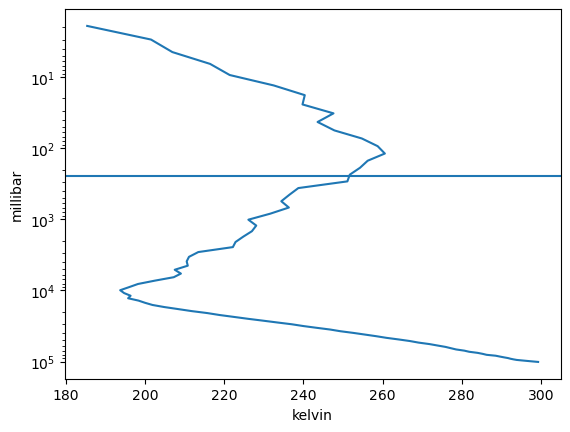

In [170]:
loc = dict(lat=800, lon=1800)
tprof = T.isel(loc).values[::-1]*units.kelvin
pprof = P.isel(loc).values[::-1]*units.mbar
plt.plot(tprof, pprof)
plt.gca().axhline(wmo(pprof, tprof))
plt.gca().set_yscale("log")
plt.gca().invert_yaxis()

In [156]:
wmo(pprof, tprof)

381.701142067783 <Unit('millibar')>